In [8]:
from ase.build import bulk
from gpaw import GPAW, PW, FermiDirac
import numpy as np
from ase.units import Hartree

# Perform standard ground state calculation (with plane wave basis)
si = bulk('Si', 'diamond', 5.43)
si.center()


calc = GPAW(mode=PW(400),xc='PBE',setups='sg15',
            kpts=(16, 16, 16),symmetry='off',
            occupations=FermiDirac(0.0001),txt=None)
si.calc = calc
si.get_potential_energy()
calc.write('Si_gs.gpw')

In [9]:
from TimeDependentHamiltonian import TimeDependentHamiltonian
from TimeDependentPropagator import TimeDependentPropagator
import matplotlib.pyplot as plt
%matplotlib inline
TDH=TimeDependentHamiltonian(calc)
TDP=TimeDependentPropagator(TDH)

In [10]:
dt=1
steps=1000
A0=[0,0,1e-3]
NSCsteps=1
epsilon,freq=TDP.linear_response(dt=dt,steps=steps,A0=A0,NSCsteps=NSCsteps)

100%|██████████| 1000/1000 [25:03<00:00,  1.47s/it]


Text(0, 0.5, '$J(t)$,a.u.')

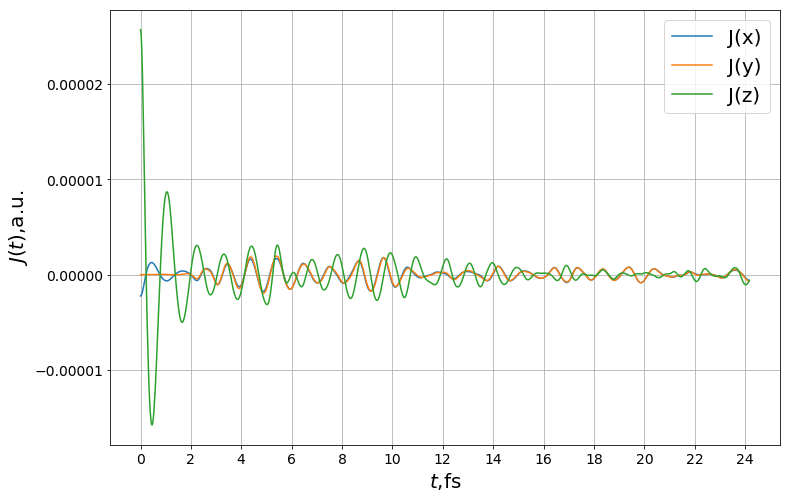

In [11]:
time=np.arange(steps)*dt
plt.figure(figsize=(12,8))
direction=['x','y','z']
for i in range(3):
    plt.plot(time/41.341 ,-TDP.J[:,i],label='J('+direction[i]+')')
plt.grid()
plt.legend(fontsize=20)
plt.xticks(np.arange(0,25,2),fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('$t$,fs',fontsize=20)
plt.ylabel('$J(t)$,a.u.',fontsize=20)
# plt.savefig('current.png',dpi=600)

(0, 10)

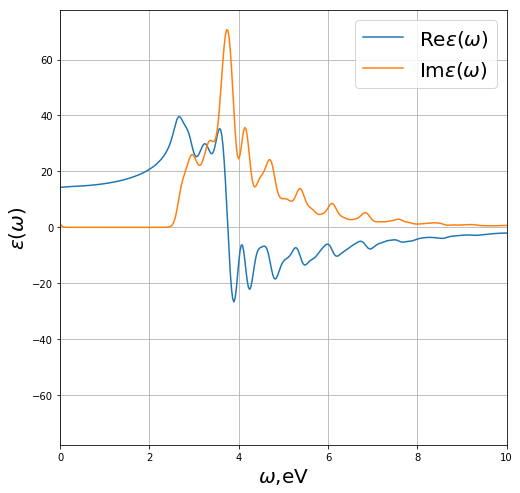

In [12]:
plt.figure(figsize=(8,8))
plt.plot(freq*Hartree,epsilon[2,2].real,label='Re$\epsilon(\omega)$')
plt.plot(freq*Hartree,epsilon[2,2].imag,label='Im$\epsilon(\omega)$')


plt.legend(fontsize=20,loc='best')
plt.xlabel('$\omega$,eV',fontsize=20)
plt.ylabel('$\epsilon(\omega)$',fontsize=20)
# plt.xticks(np.arange(-10,11,2),fontsize=14)
# plt.yticks(np.arange(-100,110,10),fontsize=14)
plt.grid()
plt.xlim([0,10])
# plt.ylim([80,80])
# plt.savefig('epsilon_smooth.png',dpi=600)